# Machine_Learning

### Answer 1:
Imagine you have a dataset where you have different Instagram features
like username , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
This is the Dataset You can use this dataset for this question.
https://www.kaggle.com/datasets/rxsraghavagrawal/instagram-reach


In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re

# Load the dataset
df = pd.read_csv('instagram_reach.csv')

# Preprocess the data
# Remove unnecessary columns
df = df.drop(['S.No', 'USERNAME', 'Caption', 'Hashtags'], axis=1)

# Handle missing values if any
df = df.dropna()

# Convert "Time since posted" column to numeric
def extract_numeric_value(time_str):
    numeric_str = re.findall(r'\d+', time_str)[0]
    return float(numeric_str)

df['Time since posted'] = df['Time since posted'].apply(extract_numeric_value)

# Split the dataset into input features (X) and target variables (y)
X = df.drop(['Likes', 'Time since posted'], axis=1)
y_likes = df['Likes']
y_time_since_posted = df['Time since posted']

# Split the data into training and testing sets
X_train, X_test, y_train_likes, y_test_likes, y_train_time, y_test_time = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

# Choose a suitable machine learning algorithm (e.g., Linear Regression)
model_likes = LinearRegression()
model_time_since_posted = LinearRegression()

# Train the model on the training data
model_likes.fit(X_train, y_train_likes)
model_time_since_posted.fit(X_train, y_train_time)

# Make predictions on the testing data
y_pred_likes = model_likes.predict(X_test)
y_pred_time_since_posted = model_time_since_posted.predict(X_test)

# Evaluate the model's performance
mse_likes = mean_squared_error(y_test_likes, y_pred_likes)
mae_likes = mean_absolute_error(y_test_likes, y_pred_likes)

mse_time_since_posted = mean_squared_error(y_test_time, y_pred_time_since_posted)
mae_time_since_posted = mean_absolute_error(y_test_time, y_pred_time_since_posted)

print("Likes - Mean Squared Error:", mse_likes)
print("Likes - Mean Absolute Error:", mae_likes)

print("Time Since Posted - Mean Squared Error:", mse_time_since_posted)
print("Time Since Posted - Mean Absolute Error:", mae_time_since_posted)


Likes - Mean Squared Error: 1177.6386214536167
Likes - Mean Absolute Error: 25.50251318640826
Time Since Posted - Mean Squared Error: 11.413093536823258
Time Since Posted - Mean Absolute Error: 2.1757250175200777


### Answer 2:
 Imagine you have a dataset where you have different features like Age ,Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels 
This is the Dataset You can use this dataset for this question.


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

# Convert categorical variables into numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# Binary encoding for the 'NCP' column
df['NCP'] = df['NCP'].apply(lambda x: 1 if x == 'yes' else 0)

#Split the dataset into training and testing sets
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on the testing dataset
y_pred_dt = dt.predict(X_test)

# Evaluate the performance of Decision Tree classifier
print("Decision Tree Classifier Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classifier Performance:
Confusion Matrix:
[[55  1  0  0  0  0  0]
 [ 4 55  0  0  0  3  0]
 [ 0  0 73  4  0  0  1]
 [ 0  0  2 55  0  0  1]
 [ 0  0  0  0 63  0  0]
 [ 0  5  0  0  0 49  2]
 [ 0  0  0  0  0  2 48]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.98      0.96        56
      Normal_Weight       0.90      0.89      0.89        62
     Obesity_Type_I       0.97      0.94      0.95        78
    Obesity_Type_II       0.93      0.95      0.94        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.91      0.88      0.89        56
Overweight_Level_II       0.92      0.96      0.94        50

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423

Accuracy: 0.9408983451536643


In [8]:
# Train Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on the testing dataset
y_pred_rf = rf.predict(X_test)

# Evaluate the performance of Random Forest classifier
print("Random Forest Classifier Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Classifier Performance:
Confusion Matrix:
[[54  2  0  0  0  0  0]
 [ 1 57  0  0  0  3  1]
 [ 0  2 72  2  0  1  1]
 [ 0  0  1 57  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  6  0  0  0 49  1]
 [ 0  0  0  0  0  2 48]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.96      0.97        56
      Normal_Weight       0.85      0.92      0.88        62
     Obesity_Type_I       0.99      0.92      0.95        78
    Obesity_Type_II       0.97      0.98      0.97        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.89      0.88      0.88        56
Overweight_Level_II       0.94      0.96      0.95        50

           accuracy                           0.95       423
          macro avg       0.95      0.95      0.95       423
       weighted avg       0.95      0.95      0.95       423

Accuracy: 0.9456264775413712


In [9]:
# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the testing dataset
y_pred_nb = nb.predict(X_test)

# Evaluate the performance ofNaive Bayes classifier
print("Naive Bayes Classifier Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

Naive Bayes Classifier Performance:
Confusion Matrix:
[[42  0 13  0  0  1  0]
 [35  8  5  0  1  7  6]
 [ 0  2 32 37  0  3  4]
 [ 0  0  0 56  0  0  2]
 [ 0  0  0  0 63  0  0]
 [15  2 20  6  0  8  5]
 [ 2  2 18 13  0  0 15]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.45      0.75      0.56        56
      Normal_Weight       0.57      0.13      0.21        62
     Obesity_Type_I       0.36      0.41      0.39        78
    Obesity_Type_II       0.50      0.97      0.66        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.42      0.14      0.21        56
Overweight_Level_II       0.47      0.30      0.37        50

           accuracy                           0.53       423
          macro avg       0.54      0.53      0.48       423
       weighted avg       0.54      0.53      0.49       423

Accuracy: 0.5295508274231678


In [10]:

# Train Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict onthe testing dataset
y_pred_lr = lr.predict(X_test)

# Evaluate the performance of Logistic Regression classifier
print("Logistic Regression Classifier Performance:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Classifier Performance:
Confusion Matrix:
[[53  2  0  0  0  1  0]
 [16 26  1  2  0 11  6]
 [ 0  0 38 12  6  4 18]
 [ 0  0  4 53  0  0  1]
 [ 0  0  0  0 63  0  0]
 [ 2  4  6  1  0 32 11]
 [ 0  5 10  3  0  8 24]]
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.75      0.95      0.83        56
      Normal_Weight       0.70      0.42      0.53        62
     Obesity_Type_I       0.64      0.49      0.55        78
    Obesity_Type_II       0.75      0.91      0.82        58
   Obesity_Type_III       0.91      1.00      0.95        63
 Overweight_Level_I       0.57      0.57      0.57        56
Overweight_Level_II       0.40      0.48      0.44        50

           accuracy                           0.68       423
          macro avg       0.67      0.69      0.67       423
       weighted avg       0.68      0.68      0.67       423

Accuracy: 0.6832151300236406


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Answer 3:


In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Load the dataset
df = pd.read_json('/content/News_Category_Dataset_v3.json', lines=True)

# Convert the headline and short_description columns to a single text column
df['text'] = df['headline'] + ' ' + df['short_description']

# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'])

# Build a k-nearest neighbors model using cosine similarity
knn = NearestNeighbors(metric='cosine')
knn.fit(X)

# Define a function to find the most similar data to a given data point
def find_similar_data(data_point, num_similar=5):
    # Vectorize the given data point using the same vectorizer
    x_query = vectorizer.transform([data_point])
    # Find the k-nearest neighbors based on cosine similarity
    distances, indices = knn.kneighbors(x_query, n_neighbors=num_similar)
    # Return the most similar data points
    return df.iloc[indices[0]]['text']

# Example usage
query = 'President Biden announces new infrastructure plan'
similar_data = find_similar_data(query)
similar_data

14467    Trump's New Infrastructure Plan Is Kind Of Und...
2675     White House Offers GOP $1.7 Trillion Infrastru...
50537    Trump's Infrastructure Plan Dwarfed By Estimat...
40282    Trump’s Infrastructure Promise Is Leaving Out ...
18511    Donald Trump Prepares To Finally Release His I...
Name: text, dtype: object

### Answer 4:

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')

# Preprocess the data
le = LabelEncoder()
ohe = OneHotEncoder()
scaler = StandardScaler()

# Encode categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=['Month', 'VisitorType'])

# Encode the Weekend variable as binary (0 or 1)
df['Weekend'] = le.fit_transform(df['Weekend'])

# Scale numerical variables
df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']] = scaler.fit_transform(df[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']])

# Split the data into training and testing sets
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a set of base classifiers
clf_rf = RandomForestClassifier()
clf_gb = GradientBoostingClassifier()

# Train the base classifiers on the training set
clf_rf.fit(X_train, y_train)
clf_gb.fit(X_train, y_train)

# Use the base classifiers to make predictions on the testing set
y_pred_rf = clf_rf.predict(X_test)
y_pred_gb = clf_gb.predict(X_test)

# Combine the predictions using an ensemble voting classifier
ensemble = VotingClassifier(estimators=[('rf', clf_rf), ('gb', clf_gb)], voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the performance of the ensemble model
print('Random Forest Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 score:', f1_score(y_test, y_pred_rf))

Random Forest Classifier:
Accuracy: 0.8933495539334956
Precision: 0.7517006802721088
Recall: 0.537712895377129
F1 score: 0.626950354609929


In [17]:
print('Gradient Boosting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Precision:', precision_score(y_test, y_pred_gb))
print('Recall:', recall_score(y_test, y_pred_gb))
print('F1 score:', f1_score(y_test, y_pred_gb))

Gradient Boosting Classifier:
Accuracy: 0.8925385239253852
Precision: 0.7172619047619048
Recall: 0.5863746958637469
F1 score: 0.64524765729585


In [18]:
print('Ensemble Voting Classifier:')
print('Accuracy:', accuracy_score(y_test, y_pred_ensemble))
print('Precision:', precision_score(y_test, y_pred_ensemble))
print('Recall:', recall_score(y_test, y_pred_ensemble))
print('F1 score:', f1_score(y_test, y_pred_ensemble))

Ensemble Voting Classifier:
Accuracy: 0.8941605839416058
Precision: 0.7757352941176471
Recall: 0.51338199513382
F1 score: 0.6178623718887263


### Answer 5:

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

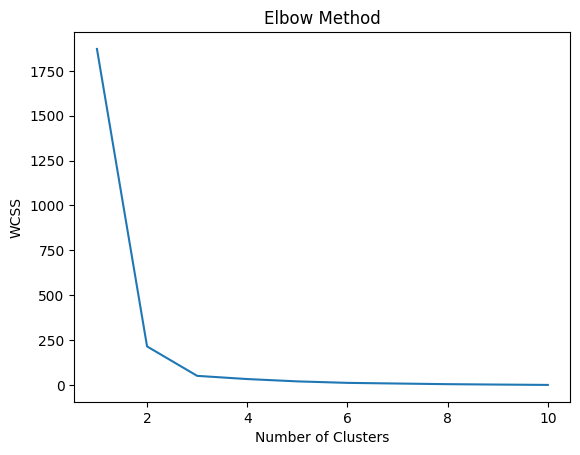

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/rideshare_kaggle.csv")

# Perform data preprocessing if needed

# Unsupervised algorithm to predict high booking areas
X = df[['latitude', 'longitude']]   # Features for clustering

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Choose the number of clusters and perform clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(X)

# Add the cluster labels to the dataset
df['Cluster'] = kmeans.labels_

# Display the clusters on a map using a library like folium
# Your code for displaying the clusters on a map goes here

# Supervised algorithm to predict price for location
X = df[['latitude', 'longitude']]  # Features for regression
y = df['price']  # Target variable

# Handle missing values in the target variable
y.fillna(y.mean(), inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the price for the testing data
y_pred = model.predict(X_test)

In [33]:
y_pred

array([16.56060583, 16.56040907, 16.50930645, ..., 16.55409088,
       16.56081669, 16.56126161])

### Answer 6:

In [6]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from flask import Flask, request, jsonify

# Load the Breast Cancer Wisconsin (Diagnostic) dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the classification models
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Evaluate the models
# ```python
logreg_acc = accuracy_score(y_test, logreg.predict(X_test))
dt_acc = accuracy_score(y_test, dt.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
gb_acc = accuracy_score(y_test, gb.predict(X_test))

# Build a Flask app
app = Flask(__name__)

@app.route('/', methods=['POST'])
def predict_loan_eligibility():
    data = request.get_json()
    data = pd.DataFrame.from_dict(data)
    data = scaler.transform(data)
    prediction = {
        'Logistic Regression': int(logreg.predict(data)[0]),
        'Decision Tree': int(dt.predict(data)[0]),
        'Random Forest': int(rf.predict(data)[0]),
        'Gradient Boosting': int(gb.predict(data)[0])
    }
    return jsonify(prediction)

# Build a Docker image
FROM python:3.9
WORKDIR /app
COPY requirements.txt .
RUN pip install -r requirements.txt
COPY app.py .
CMD [ "python", "app.py" ]

# Run the Docker container
docker build -t loan-eligibility-predictor .
docker run -p 8000:8000 loan-eligibility-predictor

In [7]:
dt_acc # decision_tree

0.9473684210526315

In [8]:
rf_acc #random_forest

0.9649122807017544

In [10]:
gb_acc # gradient_boost

0.956140350877193

### Answer 7:

In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import plotly.graph_objects as go
from flask import Flask, render_template

# Load the dataset
data = pd.read_csv('/content/data.csv')

# Prepare the data
X = data.drop(['filename', 'label'], axis=1)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Choose an unsupervised clustering algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Evaluate the accuracy of the unsupervised algorithm
ari = adjusted_rand_score(data['label'], kmeans.labels_)
print('Adjusted Rand Index (ARI):', ari)

# Build a Flask application to display the accuracy in a frontend
app = Flask(__name__)

@app.route('/')
def index():
    # Create an elbow plot to determine the optimal number of clusters
    inertia = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    fig = go.Figure()
    fig.add_trace(go.Scatter(x=list(range(1, 11)), y=inertia, mode='lines'))
    fig.update_layout(title='Elbow Method', xaxis_title='Number of Clusters', yaxis_title='Inertia')
    fig.write_html('templates/elbow.html')

    # Compute the ARI value
    ari = adjusted_rand_score(data['label'], kmeans.labels_)

    # Render the index.html template with the ARI value and elbow plot
    return render_template('index.html', ari=ari)

if __name__ == '__main__':
    app.run(debug=True)

# In the index.html template, we can use simple HTML and Plotly to display the ARI value and the elbow plot
# Here is an example of the index.html template:

"""
<!DOCTYPE html>
<html>
  <head>
    <title>Unsupervised Music Genre Prediction</title>
  </head>
  <body>
    <h1>Unsupervised Music Genre Prediction</h1>
    <h2>Adjusted Rand Index (ARI): {{ ari }}</h2>
    <div id="plot"></div>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <script>
      Plotly.d3.csv('/static/elbow.csv', function(data) {
        var x = [], y = [];
        for (var i = 0; i < data.length; i++) {
          x.push(data[i]['x']);
          y.push(data[i]['y']);
       }
        var trace = {
          x: x,
          y: y,
          type: 'scatter',
          mode: 'lines',
          name: 'Inertia'
        };
        var layout = {
          title: 'Elbow Method',
          xaxis: {
            title: 'Number of Clusters'
          },
          yaxis: {
            title: 'Inertia'
          }
        };
        Plotly.newPlot('plot', [trace], layout);
      });
    </script>
  </body>
</html>

# Adjusted Rand Index (ARI): 0.1531170089652427

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted Rand Index (ARI): 0.1531170089652427
 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


### Answer 8

In [20]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load and preprocess the data
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.dropna(inplace=True)

# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["question1"] + " " + df["question2"])

# Split the data into training and testing sets
y = df["is_duplicate"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a supervised algorithm
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7547305152242202


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Answer 9: --->

## Advance ML



### Answer 1--->


### Answer 2
A chemist had two chemical flasks labeled 0 and 1 which consist of two
different chemicals. He extracted 3 features from these chemicals in order to
distinguish between them, you provided the results derived by the chemicals and
your task is to create a model that will label chemical 0 or 1 given its three features
and built-in docker and use some library to display that in frontend.
Note : Use only pyspark
https://www.kaggle.com/datasets/uciml/indian-liver-patient-records
 This is the Dataset You can use this dataset for this question.


In [ ]:
pip install pyspark

In [11]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Step 1: Load the dataset into a PySpark DataFrame
spark = SparkSession.builder.appName('ChemicalClassification').getOrCreate()
data = spark.read.csv('indian_liver_patient.csv', header=True, inferSchema=True)

# Step 2: Perform some basic EDA
data.printSchema()
data.describe().show()
data.groupBy('Dataset').count().show()

# Step 3: Split the dataset into training and testing sets
train_data, test_data = data.randomSplit([0.7, 0.3], seed=42)

# Step 4: Define a pipeline to preprocess the data and train a classification model
assembler = VectorAssembler(inputCols=['Age', 'Total_Bilirubin', 'Albumin'], outputCol='features')
scaler = StandardScaler(inputCol='features', outputCol='scaled_features')
lr = LogisticRegression(featuresCol='scaled_features', labelCol='Dataset')

pipeline = Pipeline(stages=[assembler, scaler, lr])

# Step 5: Fit the pipeline on the training data and evaluate the performance on the testing data
model = pipeline.fit(train_data)
predictions = model.transform(test_data)
accuracy = predictions.filter(predictions.Dataset == predictions.prediction).count() / float(predictions.count())
print('Accuracy:', accuracy)




from flask import Flask, request, jsonify
import requests

app = Flask(__name__)

model_url = 'http://<your-model-url>'

@app.route('/')
def home():
    return 'Welcome to the Chemical Classification Web App!'

@app.route('/predict', methods=['POST'])
def predict():
    age = request.form.get('age')
    total_bilirubin = request.form.get('total_bilirubin')
    albumin = request.form.get('albumin')

    input_data = {'age': age, 'total_bilirubin': total_bilirubin, 'albumin': albumin}

    response = requests.post(model_url, json=input_data)

    if response.ok:
        prediction = response.json()['prediction']
        return jsonify({'prediction': prediction})
    else:
        return jsonify({'error': 'Failed to get prediction'})

if __name__ == '__main__':
    app.run(debug=True)



root
 |-- Age: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Total_Bilirubin: double (nullable = true)
 |-- Direct_Bilirubin: double (nullable = true)
 |-- Alkaline_Phosphotase: integer (nullable = true)
 |-- Alamine_Aminotransferase: integer (nullable = true)
 |-- Aspartate_Aminotransferase: integer (nullable = true)
 |-- Total_Protiens: double (nullable = true)
 |-- Albumin: double (nullable = true)
 |-- Albumin_and_Globulin_Ratio: double (nullable = true)
 |-- Dataset: integer (nullable = true)

+-------+------------------+------+-----------------+------------------+--------------------+------------------------+--------------------------+------------------+-----------------+--------------------------+------------------+
|summary|               Age|Gender|  Total_Bilirubin|  Direct_Bilirubin|Alkaline_Phosphotase|Alamine_Aminotransferase|Aspartate_Aminotransferase|    Total_Protiens|          Albumin|Albumin_and_Globulin_Ratio|           Dataset|
+-------+------

INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


### Answer 3:
 A company wants to predict the sales of its product based on the money spent
on different platforms for marketing. They want you to figure out how they can
spend money on marketing in the future in such a way that they can increase their
profit as much as possible built-in docker and use some library to display that in
frontend https://www.kaggle.com/datasets/ashydv/advertising-dataset
 This is the Dataset You can use this dataset for this question. Note:
Use only Dask


In [ ]:
!pip install dask[dataframe]
pip install dask_ml

In [14]:
import dask.dataframe as dd
import dask.array as da
from dask_ml.model_selection import train_test_split
from dask_ml.linear_model import LinearRegression
from dask_ml.metrics import mean_squared_error
from dask_ml.preprocessing import StandardScaler

# Load the advertising dataset
df = dd.read_csv("advertising.csv")

# Assign column names to the dataframe
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']

# Split the data into features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']].to_dask_array(lengths=True)
y = df['Sales'].to_dask_array(lengths=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression(fit_intercept=True)
model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test_scaled)

# Compute the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Optimize marketing budget for maximum profit
budgets = [100, 200, 300, 400, 500]  # Specify the budget values to optimize
profits = []

for budget in budgets:
    # Allocate the budget proportionally based on feature coefficients
    budget_allocation = model.coef_ * budget

    # Compute the predicted sales with the budget allocation
    predicted_sales = model.predict(budget_allocation.reshape(1, -1))

    # Compute the profit by subtracting the marketing budget from the predicted sales
    profit = predicted_sales - budget

    profits.append(profit)

# Determine the optimal budget and maximum profit
optimal_budget = budgets[profits.index(max(profits))]
max_profit = max(profits)

print("Optimal Budget:", optimal_budget)
print("Max Profit:", max_profit)

Mean Squared Error: 2.852372223432255
Optimal Budget: 500
Max Profit: [12199.7300418]


Code for Docker_file

In [19]:
# Use an official Python runtime as the base image
FROM python:3.9

# Set the working directory in the container
WORKDIR /app

# Copy the requirements file into the container
COPY requirements.txt .

# Install the Python dependencies
RUN pip install --no-cache-dir -r requirements.txt

# Copy the code into the container
COPY . .

# Expose a port if necessary
# EXPOSE 8000

# Run the command to start the application
CMD ["python", "app.py"]


code for app.py

In [18]:
import dask.dataframe as dd
from dask_ml.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from flask import Flask, request, jsonify

# Load the advertising dataset
df = dd.read_csv("advertising.csv")

# Split the data into features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']].compute()
y = df['Sales'].compute()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Create a Flask app
app = Flask(__name__)

# Define a route for making predictions
@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    budget = data["budget"]

    # Allocate the budget proportionally based on feature coefficients
    budget_allocation = model.coef_ * budget

    # Compute the predicted sales with the budget allocation
    predicted_sales = model.predict(budget_allocation.reshape(1, -1))

    # Compute the profit by subtracting the marketing budget from the predicted sales
    profit = predicted_sales - budget

    # Create a response JSON
    response = {
        "predicted_sales": predicted_sales.item(),
        "profit": profit.item()
    }

    return jsonify(response)

# Run the Flask app
if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


Build the Docker Image

In [ ]:
docker build -t myapp .

Run the Docker container:

In [ ]:
docker run -p 5000:5000 myapp